# Creating an Optimal Football Team for the 2022 FIFA World Cup

## The Goal

With the FIFA World Cup happening right now, I thought it would be interesting to take an analytical approach into selecting a team that would be optimal for competing in the world cup. This Jupyter Workbook shows my process and thinking into the selection of my team through data analysis, statistics and modelling.

## Import Libraries

The libraries that were crucical to creating the team were pandas, numpy, matplotlib, adjusttext and seaborn. These libraries gave me the tools necessary to analyse and plot the data used.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

## Importing the data

The first step was to download the CSV file from Kaggle. The data was imported using the pandas command ‘read_csv’ and stored in the football_df variable. Below shows an example of the type of data that came from Kaggle. 


In [22]:
football_df = pd.read_csv('/Users/lukeswindale/Downloads/FootballStats202122.csv')
football_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-�tienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


## Cleaning the data

The next step was to search and clean the data. To clean the data, the data was searched for null values using the isna() command. Luckily this data set was complete so there was no need for any cleaning or removing of faulty data. Unfortunately some of the foreign letters in the data are ? marks. Due to not knowing what these letters were and them being varied, they have been left as is.

In [ ]:
football_df.isna().sum()

## Selecting the team

The team will be selected based on different statistical attributes that are beneficial for that position. The formation of the team will be a standard 4-3-3. This formation includes 1 strikers, 2 wingers, 3 midfielders, 2 wingbacks, 2 centrebacks, and 1 goalkeeper.

## Position 1: Striker

The statistics to decide what striker to chose for the team were quite obvious. A striker's main task is to score goals, and in a world cup where goals can be hard to come by, having a striker that scores a lot would mean the world. 

Below shows the process into finding the top goal scorers over the 2021/22 football season. The goal stats in the data were per 90 data, so they were multiplied by the number of 90 minutes played to find the total tally.

In [38]:
football_df['Goals(total)'] = round(football_df['Goals']*football_df['90s'],1)
goalscorers = football_df[['Player','Goals(total)']].copy()
topgoalscorers = goalscorers.sort_values(by=['Goals(total)'],ascending=False)
top10goalscorers = topgoalscorers[['Player','Goals(total)']].head(10)
print(top10goalscorers) 

                  Player  Goals(total)
1512  Robert Lewandowski          35.0
1720       Kylian Mbapp�          27.9
1236       Ciro Immobile          27.1
284        Karim Benzema          27.1
265    Wissam Ben Yedder          25.0
2425       Patrik Schick          24.0
1180       Son Heung-min          23.0
2360       Mohamed Salah          23.0
1117      Erling Haaland          22.0
668       Moussa Demb�l�          21.1


A good striker scores plenty of goals but is also ice cold under pressure. Due to the knockout aspect of the world cup there is potential for penalty shoot outs, so our striker must be a great penalty taker.

Below shows the process of calculating the amount of PKs attempted for each player and their PK make percentage. We want a large enough sample size so only strikers who have taken more than 5 penalties will make the cut. The top players were then appended into the finalpentakers_df dataframe and sorted in terms of PKPercentage and PKAttempted.

In [39]:
football_df['PKAttempted'] = round(football_df['90s']*football_df['PKatt'])
football_df['PKPercentage'] = football_df['ShoPK']/football_df['PKatt']*100
pentakers = football_df[football_df['PKAttempted'] > 5]
finalpentakers_df = pentakers[['Player','PKPercentage','PKAttempted']].copy()
toppentakers = finalpentakers_df.sort_values(by=['PKPercentage','PKAttempted'],ascending=False)
top10pentakers = toppentakers.head(10)
print(top10pentakers)

                 Player  PKPercentage  PKAttempted
265   Wissam Ben Yedder    100.000000          8.0
2061      Dimitri Payet    100.000000          7.0
2528       Carlos Soler    100.000000          7.0
286    Domenico Berardi    100.000000          6.0
1117     Erling Haaland    100.000000          6.0
1643     Thomas Mangani    100.000000          6.0
1296           Jorginho     85.714286          7.0
1299             Joselu     85.000000          7.0
595   Domenico Criscito     84.615385          7.0
1070     Vincenzo Grifo     84.210526          6.0



To help visualise the data above, a scatter plot was drawn to show how the different penalty takers compare to each other.

In [ ]:
%matplotlib inline

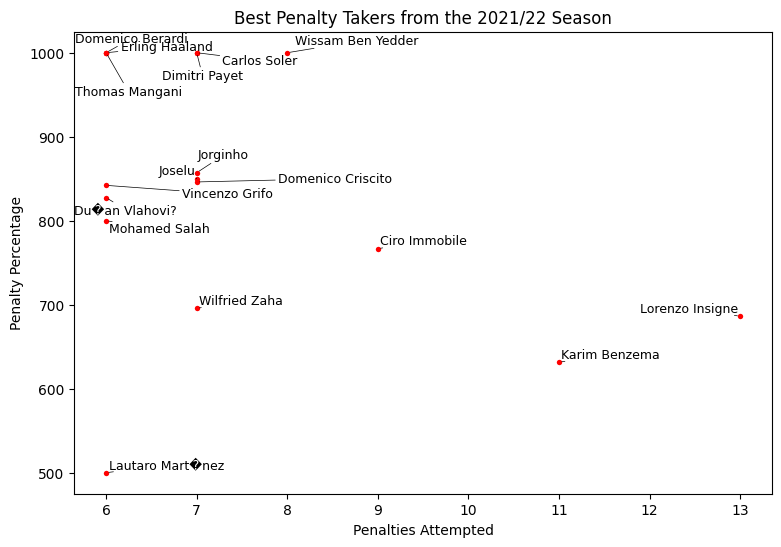

In [47]:
def plot_pentakers(adjust=True, *args, **kwargs):
    plt.figure(figsize=(9, 6))
    plt.scatter(finalpentakers_df['PKAttempted'].to_numpy(), finalpentakers_df['PKPercentage'].to_numpy()*10, s=15, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(finalpentakers_df['PKAttempted'].to_numpy(), finalpentakers_df['PKPercentage'].to_numpy()*10, finalpentakers_df['Player'].to_numpy()):
        texts.append(plt.text(x, y, s, size=9))
    plt.xlabel('Penalties Attempted')
    plt.ylabel('Penalty Percentage')
    if adjust:
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                                                save_steps=False, save_prefix='/Users/lukeswindale/Downloads/FootballStats202122.csv', **kwargs)
        plt.title("Best Penalty Takers from the 2021/22 Season")
    else:
        plt.title('Original')


plot_pentakers()

### Making the choice

To find our striker, an inner join was made between the top10goalscorers and top10penaltytakers dataframes to see if there were any strikers who made both lists. The results are seen below

In [41]:
joindf = pd.merge(top10pentakers,top10goalscorers, on='Player',how='inner')
print(joindf)

              Player  PKPercentage  PKAttempted  Goals(total)
0  Wissam Ben Yedder         100.0          8.0          25.0
1     Erling Haaland         100.0          6.0          22.0


Two great candidates. The choice for our striker is obvious due to Wissam's greater goal count and number of PKs attempted while having the same PK percentage.

### Striker Choice: Wissam Ben Yedder

## Positions 2 & 3: Wingers

The main aim for our wingers is to receieve the ball from the midfield, beat their defender, then create a chance for our striker. These attributes are what our 2 wingers are going to be chosen from. To ensure the data was not skewed due to players playing a minimal amount of minutes, only players who played more than 500 minutes in the 2021/22 season were chosen, and then moved into a new dataframe called newFootball_df.

The first attribute that was explored was a players dribbling ability. The two data points that made the most sense to use in this context was the DriSucc column which showed the amount of dribbles completed successfully per ninety minutes, and the DriSucc% column which showed the percentage of dribbles completed successfully per ninety minutes. To combine these two statistics, an arbitrary value named DribbleScore was created to rank the dribblers. This was created by multiplying DriSucc and DriSucc%. The top dribblers in this atribute are shown below.



In [51]:
newFootball_df = football_df[football_df['Min'] > 500]
football_df['DribbleScore'] = round(newFootball_df['DriSucc']*football_df['DriSucc%'],1)
dribblers = football_df[['Player','DribbleScore']].copy()
topdribblers = dribblers.sort_values(by=['DribbleScore'],ascending=False)
top20dribblers = topdribblers[['Player','DribbleScore']].head(20)
print(top20dribblers.head(10))

                     Player  DribbleScore
2692           Adama Traor�         372.4
841   Abdessamad Ezzalzouli         279.5
1381          Sofian Kiyine         276.0
2354    Allan Saint-Maximin         273.4
332            Jeremie Boga         248.4
2637                   Tet�         246.1
2588     Kamaldeen Sulemana         242.7
669         Ousmane Demb�l�         227.2
640         Alphonso Davies         217.9
534        Samuel Chukwueze         208.5


The second attribute that was looked at in search for our wingers was ScaPassLive which is the completed live-ball passes that lead to a shot attempt. The data below shows the result of players with the highest ScaPassLive per ninety minutes that have also played above 500 minutes in total.

In [53]:
sca = newFootball_df[['Player','ScaPassLive']].copy()
topsca = sca.sort_values(by=['ScaPassLive'],ascending=False)
top20sca = topsca[['Player','ScaPassLive']].head(20)
print(top20sca.head(10))

               Player  ScaPassLive
1146      Eden Hazard         4.50
1774     Lionel Messi         4.31
1869    Thomas M�ller         4.30
1233     Josip Ili?i?         4.19
1923           Neymar         4.08
1058    Jack Grealish         4.08
2061    Dimitri Payet         4.03
1312  Vinicius J�nior         3.98
2229       Ante Rebi?         3.84
646   Kevin De Bruyne         3.84


### Making the choice

Our ideal wingers would be players that would fit into both of these lists. The top 10 did not include any players who had such the attributes, so the sample size was increased to 20 players for both lists. These larger lists were then subject to an inner join, where 4 wingers remained and were looked at for selection.

In [54]:
wingerjoin = pd.merge(top20sca,top20dribblers, on='Player',how='inner')
print(wingerjoin)

            Player  ScaPassLive  DribbleScore
0      Eden Hazard         4.50         196.6
1     Lionel Messi         4.31         189.9
2     Jeremie Boga         3.65         248.4
3  Ousmane Demb�l�         3.57         227.2


With ScaPassLive arbitrarily chosen as the heavier weighted attribute, 2 legends stood atop the pile and were chosen for our world cup team. 

### Winger Choices: LW - Eden Hazard, RW - Lionel Messi

## Positions 4, 5 & 6: Midfielders

The next positions that need to be found are our midfielders. The midfielders that we want in our team are players who work hard, cover the pitch, and stop opposing attacks. They also need to be able to control the game through accurate passing and efficient carrying of the ball. These players will also only be selected if they managed more than 500 minutes in the 2021/22 season. To balance the midfield, 2 defensive minded midfielder and 1 attacking minded midfielder will be selected.

### Defensive Midfielders

For the defensive midfielders, the attributes that will be targeted will be PasTotCmp% which is their pass completion percentage, and Tkl+Int which is the number of players tackled plus number of interceptions. The 2 players with the best combination of these two stats will be selected. 

The size of the dataset had to be increased to the top 150 players for each attribute to find players that excelled in both. After making an inner join on these two dataframes, 5 potential defensive midfielders were found


In [56]:
passers = newFootball_df[['Player','PasTotCmp%']].copy()
toppassers = passers.sort_values(by=['PasTotCmp%'],ascending=False)
top20passers = toppassers[['Player','PasTotCmp%']].head(150)

tacklers = newFootball_df[['Player','Tkl+Int']].copy()
toptacklers = tacklers.sort_values(by=['Tkl+Int'],ascending=False)
top20tacklers = toptacklers[['Player','Tkl+Int']].head(150)

midfielderjoin = pd.merge(top20passers,top20tacklers, on='Player',how='inner')
print(midfielderjoin)

               Player  PasTotCmp%  Tkl+Int
0  Idrissa Gana Gueye        93.4     5.38
1       Samuele Ricci        91.6     5.29
2       Yves Bissouma        89.7     5.45
3    Thiago Alc�ntara        89.6     5.47
4   Rodrigo Bentancur        89.2     5.63


Being close to the 150th ranked player for PasTotCmp% and Tkl+Int and still having those statistics shows the absurd amount of talent in the top football leagues. From this list our 2 defensive midfielders were chosen due to their superior passing stats. 

### Defensive Midfield Choices: Idrissa Gana Gueye and Samuele Ricci

### Attacking Midfielder

For our attack focused midfielder the attributes needed to be more focused on forward passes and forward ball carries rather than defensive attributes. The two sets of data that were chosen to find our player were CarProg which is the amount of carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area, and Pas3rd, which is the number of completed passes that enter the 1/3 of the pitch closest to the goal.

After finding our best set of players for each of the two attributes, another inner join was made on these two datasets to find our final midfielder. The midfielder was found after increasing the size of each dataset to 24 players



In [57]:
forwarddribbers = newFootball_df[['Player','CarProg']].copy()
topforwarddribbers = forwarddribbers.sort_values(by=['CarProg'],ascending=False)
top20forwarddribbers = topforwarddribbers[['Player','CarProg']].head(24)

forwardpassers = newFootball_df[['Player','Pas3rd']].copy()
topforwardpassers = forwardpassers.sort_values(by=['Pas3rd'],ascending=False)
top20forwardpassers = topforwardpassers[['Player','Pas3rd']].head(24)

attackmidfielderjoin = pd.merge(top20forwarddribbers,top20forwardpassers, on='Player',how='inner')
print(attackmidfielderjoin)

            Player  CarProg  Pas3rd
0     Lionel Messi    12.10    8.08
1  Aymeric Laporte    11.20   10.10
2   Marco Verratti     9.72    8.05


Due to Lionel Messi already being included in the team as a winger, and Aymeric Laporte being a defender, our final midfielder was found

### Attacking Midfielder: Marco Verratti

## Positions 7 & 8: Fullbacks

Wingbacks are one of the most important poistions in modern football. They need to be extremely active in both the attacking and defensive phases of the game. The most important attributers for our fullbacks needs to be being confident in tackling dribblers 1 on 1 and delivering great crosses into the box. The attributes that show us this from the data are CrsPA, which is the number of completed crosses into the 18-yard box, and TklDri, which is the number of dribblers tackled. Finding a player with that excels in both of these attributes will find us our perfect fullbacks. Below shows the results of this analysis, the top 40 players from each attribute were looked at to find two fullbacks

In [58]:
crossers = newFootball_df[['Player','CrsPA']].copy()
topcrossers = crossers.sort_values(by=['CrsPA'],ascending=False)
top20crossers = topcrossers[['Player','CrsPA']].head(40)

tackling = newFootball_df[['Player','TklDri']].copy()
toptackling = tackling.sort_values(by=['TklDri'],ascending=False)
top20tackling = toptackling[['Player','TklDri']].head(40)


fullbackjoin = pd.merge(top20tackling,top20crossers, on='Player',how='inner')
print(fullbackjoin)

            Player  TklDri  CrsPA
0  Dimitri Li�nard    1.72   1.15
1      Lucas Digne    1.69   1.13
2    Benno Schmitz    1.64   0.89


Due to Dimitri Liènard being a midfielder, he was disregarded and that left our two fullbacks. 

### Fullbacks: LB - Lucas Digne, RB - Benno Schmitz

## Positions 9 & 10: Centre Backs

For our big men at the back, we need players who are good on the ball, who are great at recycling play, but also are more than able to get dirty, making tackles and clearing balls out of the defensive third. The three attributes that will be focused on to find the centre backs is PasTotCmp%, which is their pass completion percentage, Clr,  which is their number of clearances, and Tkl+Int, which is the number of players that they have tackled plus the number of interceptions they have made. Below shows the results

In [59]:
passers2 = newFootball_df[['Player','PasTotCmp%']].copy()
toppassers2 = passers2.sort_values(by=['PasTotCmp%'],ascending=False)
top20passers2 = toppassers[['Player','PasTotCmp%']].head(250)

tacklers2 = newFootball_df[['Player','Tkl+Int']].copy()
toptacklers2 = tacklers2.sort_values(by=['Tkl+Int'],ascending=False)
top20tacklers2 = toptacklers2[['Player','Tkl+Int']].head(250)

clearers = newFootball_df[['Player','Clr']].copy()
topclearers = clearers.sort_values(by=['Clr'],ascending=False)
top20clearers = topclearers[['Player','Clr']].head(250)


cbjoin = pd.merge(top20passers2,top20tacklers2, on='Player',how='inner')
cbjoin2 = pd.merge(cbjoin,top20clearers, on='Player',how='inner')
print(cbjoin2)

               Player  PasTotCmp%  Tkl+Int   Clr
0  Jannik Vestergaard        91.9     4.92  6.51
1     Marin Pongra?i?        88.2     5.87  4.67
2  Christophe H�relle        88.1     5.21  4.05
3        Mats Hummels        87.9     4.90  4.18


After looking through the top 250 players for each attribute, these 4 great players were left. After selecting the top 2 players from this list, our outfield is now complete. 

### Centre Backs: Jannik Vestergaard & Marin Pongračić

## Position 11: Goalkeeper.

An extremelely important player in a cup format such as the world cup. Our goalkeeper needs to be a great shot stopper, not letting anything past him when all goals are as important as they are in the world cup.

Due to the original dataset not having goalkeeper statistics. A new set of data was found for the English Premier League goalkeepers from the 2021/22 and the goalkeeper was chosen from here. To chose our goalkeeper, the player with the highest save percentage that played over 500 minutes of football from last season was chosen.


In [61]:
goalkeeper_df = pd.read_csv('/Users/lukeswindale/Desktop/Gkstats2.csv')
newGoalkeeper_df =  goalkeeper_df[goalkeeper_df['Minutes'] > 500]
keepers = newGoalkeeper_df[['Player','Save%']].copy()
topKeepers = keepers.sort_values(by=['Save%'],ascending=False)
print(topKeepers.head(5))

           Player  Save%
34        Jos� S�   80.6
32     David Raya   77.7
0         Alisson   75.8
26  Edouard Mendy   75.5
30      Nick Pope   74.5


After a great amount of analysis, the final player for our 2022 World Cup squad has been found

### Goalkeeper: Jose Sa

## The Final Squad

After analysing the best players that have performed throughout the 2021/22 season from the top 5 professional leagues, we have chosen 11 players who are the most suited for their roles. Our attackers are clinical, our midfield are dynamic and fearless, and our defenders are resolute and calm. Below shows a graphic made on buildlineup.com showing where each of our players would find themselves on the pitch in the 2022 World Cup. 

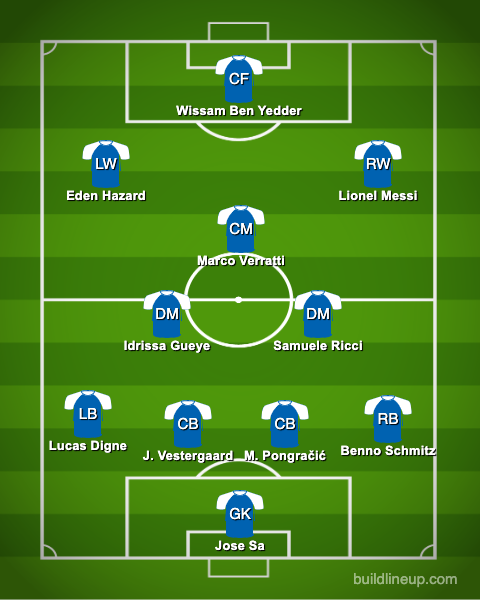